<a href="https://www.kaggle.com/code/saibhossain/most-importants-plots-data-science?scriptVersionId=290895294" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 📊 Essential Evaluation & Diagnostic Plots





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.datasets import make_classification, make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

np.random.seed(42)

---

###  **KS Plot (Kolmogorov–Smirnov)**
- **What it shows**: Separation between predicted probabilities of **positives vs. negatives**.
- **Calculation**:
  - Sort samples by predicted probability (descending)
  - Compute CDF of positives and CDF of negatives
  - $ \text{KS} = \max \left| \text{CDF}_{\text{positive}} - \text{CDF}_{\text{negative}} \right| $
- **How to read**:
  - **Higher KS** → better class separation  
  - KS ≈ 0 → poor model  
  - **KS > 0.4** → strong classifier (common rule of thumb)  
- **Best for**: Credit scoring, risk modeling

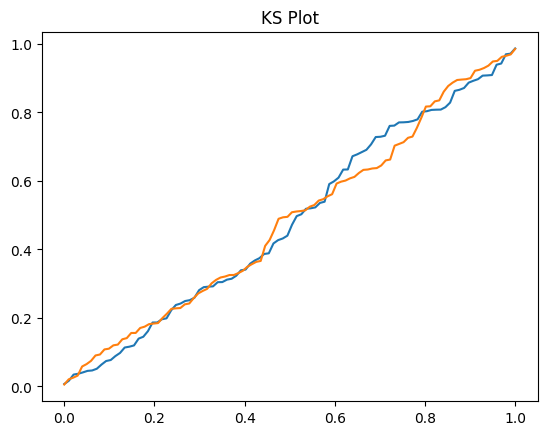

In [1]:
# ---------- 1. KS Plot ----------
X, y = make_classification(n_samples=200, random_state=42)
scores = np.random.rand(200)

pos = scores[y == 1]
neg = scores[y == 0]

pos_cdf = np.sort(pos)
neg_cdf = np.sort(neg)

plt.figure()
plt.plot(np.linspace(0,1,len(pos_cdf)), pos_cdf)
plt.plot(np.linspace(0,1,len(neg_cdf)), neg_cdf)
plt.title("KS Plot")
plt.show()

---

###  **ROC Curve**
- **What it shows**: Trade-off between **True Positive Rate (TPR)** and **False Positive Rate (FPR)** across thresholds.
- **Formulas**:
  - $ \text{TPR} = \frac{TP}{TP + FN} $
  - $ \text{FPR} = \frac{FP}{FP + TN} $
- **How to read**:
  - Curve closer to **top-left** = better model  
  - **AUC = 1** → perfect  
  - **AUC = 0.5** → random guessing
- **Best for**: Balanced classification problems

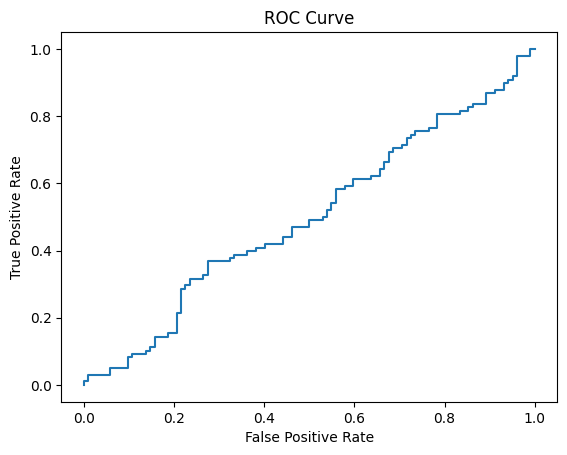

In [2]:
# ---------- 2. ROC Curve ----------
fpr, tpr, _ = roc_curve(y, scores)
plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

---

### **Precision–Recall (PR) Curve**
- **What it shows**: Performance on **imbalanced datasets**.
- **Formulas**:
  - $ \text{Precision} = \frac{TP}{TP + FP} $  
  - $ \text{Recall} = \frac{TP}{TP + FN} $
- **How to read**:
  - **High area** → good detection of rare positives  
  - **Baseline** = proportion of positive class  
  - More informative than ROC when positives are rare
- **Best for**: Medical diagnosis, fraud detection, rare-event modeling


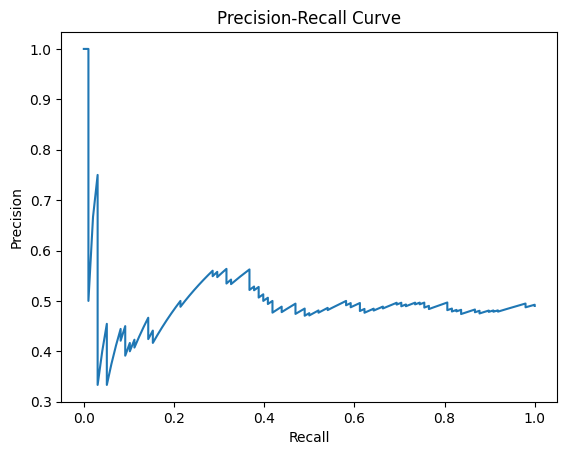

In [3]:
# ---------- 3. Precision-Recall Curve ----------
precision, recall, _ = precision_recall_curve(y, scores)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

---

###  **Q-Q Plot (Quantile–Quantile)**
- **What it shows**: Whether data follows a theoretical distribution (e.g., normal).
- **Calculation**: Plot sample quantiles vs. theoretical quantiles.
- **How to read**:
  - **Points on straight line** → matches distribution  
  - **S-shape** → skewness  
  - **Heavy tails** → outliers or non-normality
- **Best for**: Residual diagnostics, normality checks

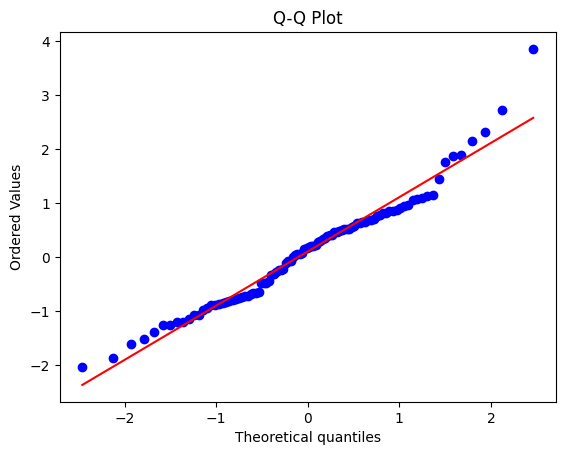

In [4]:
# ---------- 4. QQ Plot ----------
data = np.random.normal(0, 1, 100)
stats.probplot(data, plot=plt)
plt.title("Q-Q Plot")
plt.show()

---

###  **Cumulative Explained Variance (PCA)**
- **What it shows**: Total variance captured as PCA components increase.
- **Formula**:
  $$
  \text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum \lambda}
  $$
  (cumulative sum over components)
- **How to read**:
  - Choose number of components where curve **flattens**  
  - Common target: **90–95%** cumulative variance
- **Best for**: Dimensionality reduction decisions

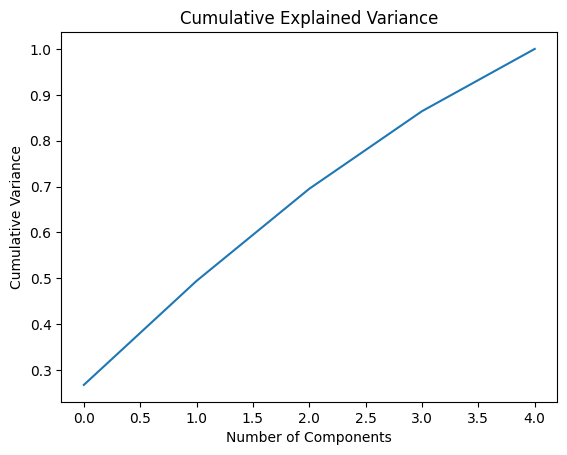

In [5]:
# ---------- 5. Cumulative Explained Variance ----------
X_pca = np.random.rand(100, 5)
pca = PCA()
pca.fit(X_pca)
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cum_var)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.show()

---

###  **Elbow Curve (K-Means)**
- **What it shows**: Helps select optimal number of clusters $ K $.
- **Metric**: Within-Cluster Sum of Squares (WCSS):
  $$
  \text{WCSS} = \sum \| x - \mu_{\text{cluster}} \|^2
  $$
- **How to read**:
  - Look for the **"elbow"** point  
  - Beyond elbow: diminishing returns in clustering quality
- **Best for**: Choosing $ K $ in unsupervised learning

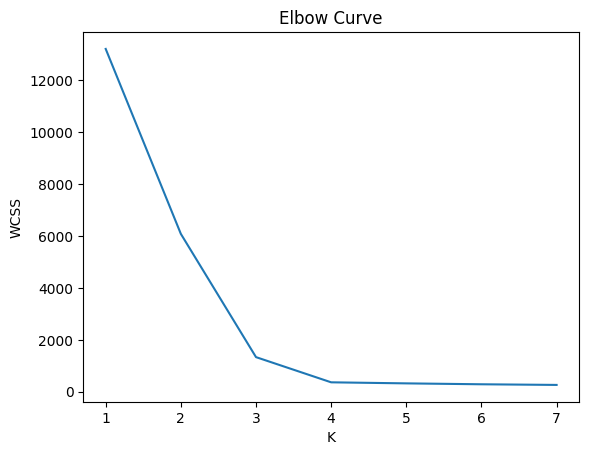

In [6]:
# ---------- 6. Elbow Curve ----------
X_cluster, _ = make_blobs(n_samples=200, centers=4, random_state=42)
wcss = []
for k in range(1, 8):
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X_cluster)
    wcss.append(km.inertia_)

plt.figure()
plt.plot(range(1, 8), wcss)
plt.title("Elbow Curve")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

---

###  **Silhouette Curve**
- **What it shows**: Cluster quality (cohesion vs. separation).
- **Formula** (per sample):
  $$
  s = \frac{b - a}{\max(a, b)}
  $$
  - $ a $: mean intra-cluster distance  
  - $ b $: nearest-cluster distance
- **How to read**:
  - Range: **−1 to +1**  
  - **+1** → well-separated cluster  
  - **≈0** → overlapping clusters  
  - **−1** → misassigned
- **Best for**: Validating cluster structure


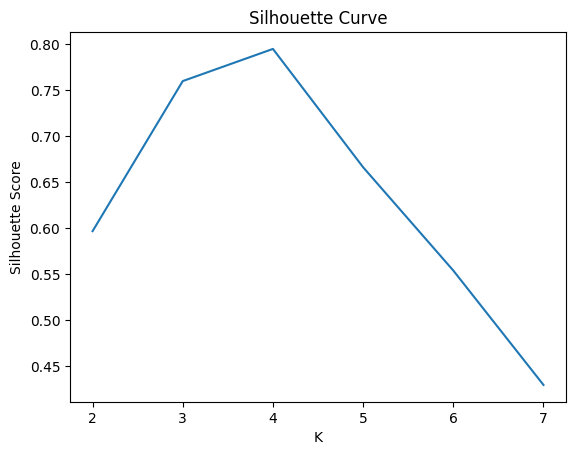

In [7]:
# ---------- 7. Silhouette Score Curve ----------
sil_scores = []
k_range = range(2, 8)
for k in k_range:
    km = KMeans(n_clusters=k, n_init=10)
    labels = km.fit_predict(X_cluster)
    sil_scores.append(silhouette_score(X_cluster, labels))

plt.figure()
plt.plot(k_range, sil_scores)
plt.title("Silhouette Curve")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()

---

###  **Gini Impurity vs Entropy (Decision Trees)**
- **Purpose**: Splitting criteria for tree nodes.
- **Formulas**:
  - **Gini**: $ 1 - \sum p_i^2 $  
  - **Entropy**: $ -\sum p_i \log_2 p_i $
- **Comparison**:
  - Both = 0 → pure node  
  - **Entropy** penalizes uncertainty more strongly  
  - **Gini** is faster (no log computation)
- **Best for**: Understanding tree-based model behavior

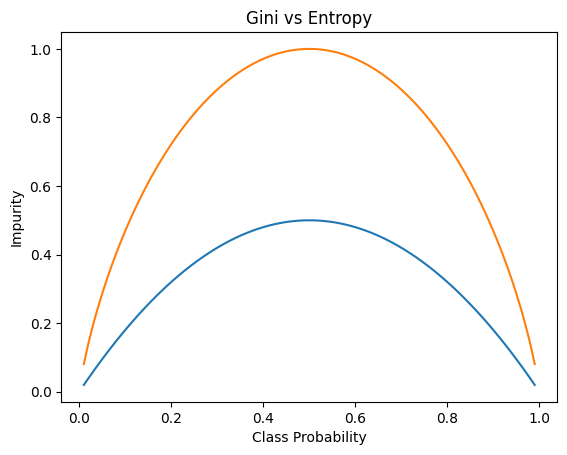

In [8]:
# ---------- 8. Gini vs Entropy ----------
p = np.linspace(0.01, 0.99, 100)
gini = 1 - (p**2 + (1-p)**2)
entropy = -(p*np.log2(p) + (1-p)*np.log2(1-p))

plt.figure()
plt.plot(p, gini)
plt.plot(p, entropy)
plt.title("Gini vs Entropy")
plt.xlabel("Class Probability")
plt.ylabel("Impurity")
plt.show()

---

### **Bias–Variance Tradeoff**
- **What it shows**: Relationship between model complexity and error.
- **Decomposition**:
  $$
  \text{Error} = \text{Bias}^2 + \text{Variance} + \text{Noise}
  $$
- **How to read**:
  - **High bias** → underfitting (too simple)  
  - **High variance** → overfitting (too complex)  
  - Optimal model minimizes **total error**
- **Best for**: Model selection & regularization tuning

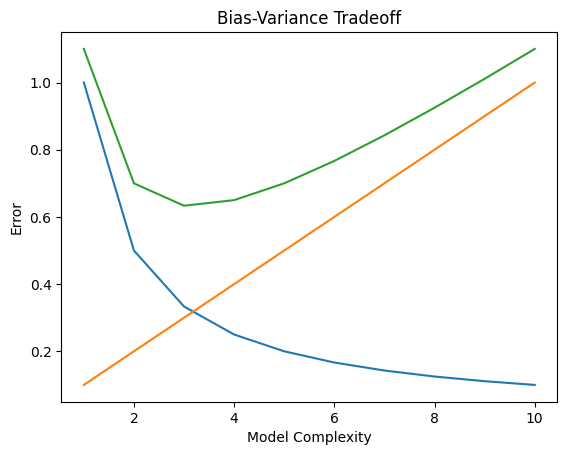

In [9]:
# ---------- 9. Bias-Variance Tradeoff ----------
complexity = np.arange(1, 11)
bias = 1 / complexity
variance = complexity / 10
total_error = bias + variance

plt.figure()
plt.plot(complexity, bias)
plt.plot(complexity, variance)
plt.plot(complexity, total_error)
plt.title("Bias-Variance Tradeoff")
plt.xlabel("Model Complexity")
plt.ylabel("Error")
plt.show()

---

### **Partial Dependence Plot (PDP)**
- **What it shows**: Marginal effect of a feature on predictions.
- **Formula**:
  $$
  \text{PDP}(x_s) = \mathbb{E}_{x_c} [f(x_s, x_c)]
  $$
  (average over other features $ x_c $)
- **How to read**:
  - **X-axis**: Feature value  
  - **Y-axis**: Average model prediction  
  - Shape reveals **monotonic**, **nonlinear**, or **threshold** effects
- **Best for**: Global feature impact analysis

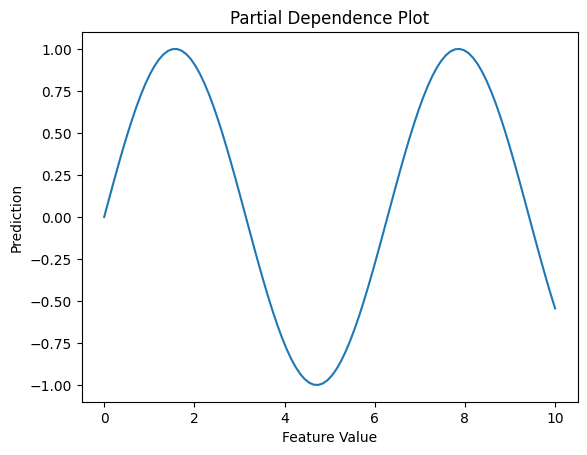

In [10]:
# ---------- 10. Partial Dependence (Manual) ----------
x = np.linspace(0, 10, 100)
y_pred = np.sin(x)

plt.figure()
plt.plot(x, y_pred)
plt.title("Partial Dependence Plot")
plt.xlabel("Feature Value")
plt.ylabel("Prediction")
plt.show()

---

###  **SHAP Plot (SHapley Additive exPlanations)**
- **What it shows**: Feature contributions to individual predictions.
- **Calculation**: Based on Shapley values from cooperative game theory:
  $$
  \text{Prediction} = \text{Base Value} + \sum \text{SHAP}_i
  $$
- **How to read**:
  - **X-axis**: Impact on prediction (higher = more positive)
  - **Color**: Feature value (red = high, blue = low)
  - **Wide spread** → important feature  
  - Direction shows if feature increases/decreases output
- **Best for**: Model interpretability & explainability


---

##  Quick Reference: When to Use Which Plot?

| Plot | Best Used For |
|------|----------------|
| **ROC Curve** | Balanced classification |
| **Precision–Recall Curve** | Imbalanced datasets |
| **KS Plot** | Risk scoring, credit models |
| **SHAP Plot** | Model interpretability |
| **Elbow Curve** | Choosing number of clusters ($ K $) |
| **Silhouette Plot** | Validating cluster quality |
| **PDP** | Understanding feature effects |
| **Q-Q Plot** | Checking distributional assumptions |
| **Cumulative Variance (PCA)** | Dimensionality reduction |
| **Bias–Variance** | Diagnosing under/overfitting |